In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler,  LabelEncoder

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
a = df[(df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0)]
len(a)

20

In [8]:
df = df[(df[["x", "y", "z"]] != 0).all(axis=1)]
df.shape

(53920, 10)

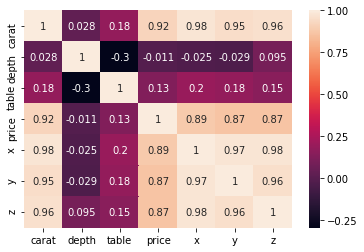

In [9]:
sns.heatmap(data=df.corr(), annot=True)

In [10]:
df["volume"] = df["x"]*df["y"]*df["z"]
df.drop(["x", "y", "z"], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [11]:
df[df["volume"] ==  0]

,carat,cut,color,clarity,depth,table,price,volume


/Users/kaorinakajima/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


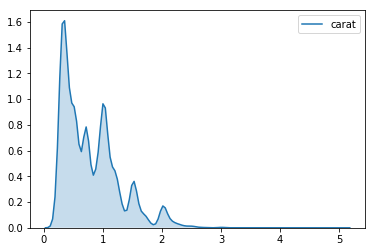

In [12]:
sns.kdeplot(df["carat"], shade=True)

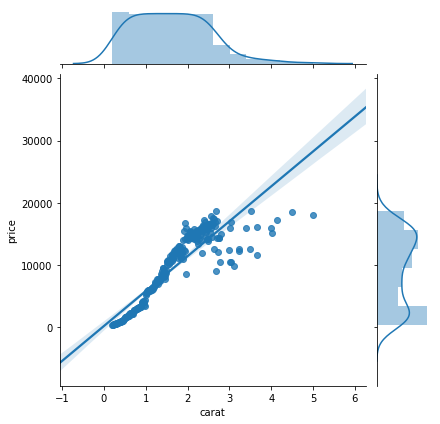

In [13]:
carat = df[["carat", "price"]].groupby(["carat"], as_index=False).mean()
sns.jointplot(carat["carat"], carat["price"], kind="reg")

/Users/kaorinakajima/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


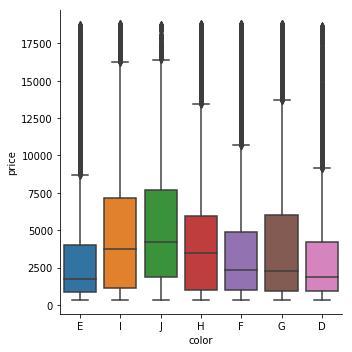

In [14]:
sns.factorplot(data=df, x="color", y="price", kind="box")

/Users/kaorinakajima/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


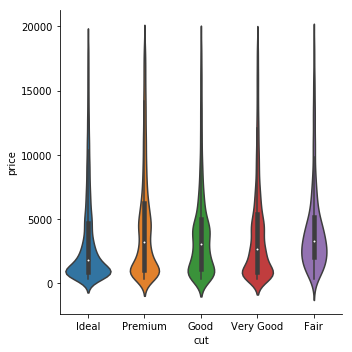

In [15]:
sns.factorplot(data=df, x="cut", y="price", kind="violin")

/Users/kaorinakajima/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


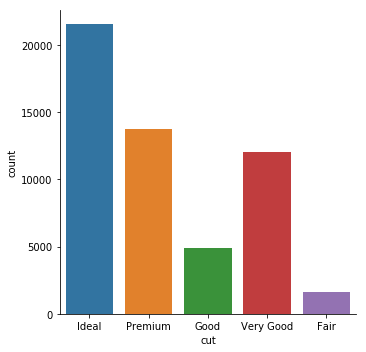

In [16]:
sns.factorplot(data=df, kind="count", x="cut")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 8 columns):
carat      53920 non-null float64
cut        53920 non-null object
color      53920 non-null object
clarity    53920 non-null object
depth      53920 non-null float64
table      53920 non-null float64
price      53920 non-null int64
volume     53920 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 6.2+ MB


In [18]:
df = pd.get_dummies(df)
df.head()

,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,34.505856,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,38.076885,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,46.724580,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,51.917250,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [19]:
X = df.drop(["price"], axis=1)
y = df["price"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train.head()
type(X_train)

pandas.core.frame.DataFrame

In [21]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)
sc_test = sc.transform(X_test)

/Users/kaorinakajima/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kaorinakajima/miniconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/kaorinakajima/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
lr = LinearRegression()
lr.fit(sc_train, y_train)
y_pred = lr.predict(sc_test)
lr.score(sc_test, y_test)

0.9120513875343098

In [23]:
rm = RandomForestRegressor()
rm.fit(sc_train, y_train)
y_pred = rm.predict(sc_test)
rm.score(sc_test, y_test)

/Users/kaorinakajima/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9806834440174561

In [24]:
kr = KNeighborsRegressor()
kr.fit(sc_train, y_train)
y_pred = kr.predict(sc_test)
kr.score(sc_test, y_test)

0.9461447817240173

In [25]:
ri = Ridge()
ri.fit(sc_train, y_train)
ri.score(sc_test, y_test)

0.9119920493681486